In [1]:
# Cell 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")
print("Libraries imported successfully!")

TensorFlow Version: 2.19.0
Libraries imported successfully!


In [2]:
# Cell 2: Load and Preprocess Data
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Original Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Original Testing data shape: {X_test.shape}, Labels shape: {y_test.shape}")

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to (height, width, channels) - MNIST is grayscale, so channels=1
X_train = np.expand_dims(X_train, -1) # Adds a channel dimension
X_test = np.expand_dims(X_test, -1)

print(f"\nNormalized and Reshaped Training data shape: {X_train.shape}")
print(f"Normalized and Reshaped Testing data shape: {X_test.shape}")

# One-hot encode the labels
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"One-hot encoded Training labels shape: {y_train_one_hot.shape}")
print(f"One-hot encoded Testing labels shape: {y_test_one_hot.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Original Training data shape: (60000, 28, 28), Labels shape: (60000,)
Original Testing data shape: (10000, 28, 28), Labels shape: (10000,)

Normalized and Reshaped Training data shape: (60000, 28, 28, 1)
Normalized and Reshaped Testing data shape: (10000, 28, 28, 1)
One-hot encoded Training labels shape: (60000, 10)
One-hot encoded Testing labels shape: (10000, 10)


In [3]:
# Cell 3: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Helps prevent overfitting
    Dense(num_classes, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\user\OneDrive\Documents\PLP\AI_Tools_Assignment\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Cell 7: Save the Trained Model
import os

# Define the directory to save the model
model_dir = 'bonus_deployment/saved_models'
os.makedirs(model_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the model path
model_path = os.path.join(model_dir, 'mnist_cnn_model.h5')

# Save the entire model (architecture, weights, optimizer state)
model.save(model_path)

print(f"Model saved successfully to: {model_path}")
print("You can now find 'mnist_cnn_model.h5' inside the 'bonus_deployment/saved_models' folder.")

Model saved successfully to: bonus_deployment/saved_models\mnist_cnn_model.h5
You can now find 'mnist_cnn_model.h5' inside the 'bonus_deployment/saved_models' folder.


In [5]:
# Cell 3: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Helps prevent overfitting
    Dense(num_classes, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Test Loss: 2.3047
Test Accuracy: 0.0763


NameError: name 'history' is not defined

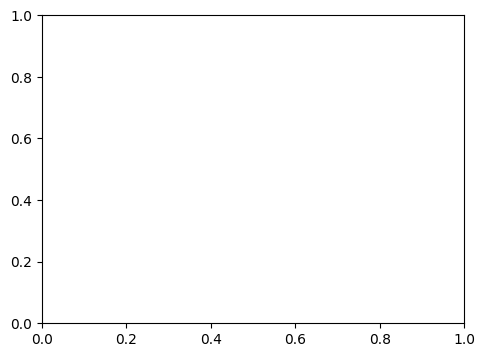

In [6]:
# Cell 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Cell 7: Save the Trained Model (for Bonus Task)
import os

# Define the directory to save the model
model_dir = 'bonus_deployment/saved_models'
os.makedirs(model_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the model path
model_path = os.path.join(model_dir, 'mnist_cnn_model.h5')

# Save the entire model (architecture, weights, optimizer state)
model.save(model_path)

print(f"Model saved successfully to: {model_path}")
print("You can now find 'mnist_cnn_model.h5' inside the 'bonus_deployment/saved_models' folder.")